In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("E:\\LEARNBAY\\Deep Learning\\Projects\\May\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Pre Processing Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
# User ID is not very useful - so we can simply delete it.

df = df.drop(['User ID'],axis=1)

In [19]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [20]:
# 1. Missing Data 

df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
# NO MISSING DATA.

In [22]:
# 2. Encoding

In [14]:
# df = pd.get_dummies(df,columns =['Gender'],drop_first=True)

# Will do this at the end after EDA. 

In [23]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [24]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
# not much variations are seen.

In [27]:
# 4. Imbalanced Dataset. 

df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [29]:
143*2

286

not an imbalanced dataset.

##### 5. Feature scaling - is not done.it is a classification problem and the models to be run here are - Logistic Regression, 
Decision Tree, Random Forest, KNN and Boosting techniques. 

If the model accuracy comes less then will try to scale the data and will run the models again, for now we are good to go. 

# PRE_PROECSSING ENDS.

# EDA

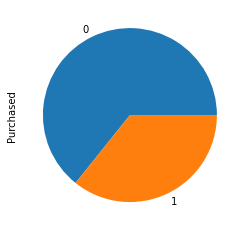

In [36]:
df['Purchased'].value_counts().plot(kind='pie')
plt.show()

<AxesSubplot:>

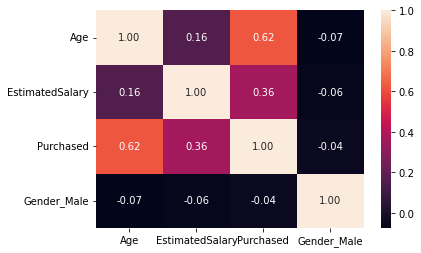

In [78]:
sns.heatmap(df.corr(),annot=True,fmt='0.02f')

In [ ]:
#Not much correlation seen between any of the variables. 

In [37]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:xlabel='Gender'>

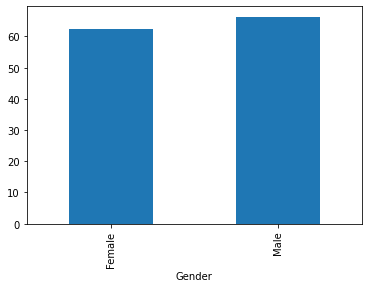

In [48]:
gender = pd.crosstab(df["Gender"],df["Purchased"])
gender['Total'] = gender[0] + gender[1]
gender['% - 1'] = gender[0]/gender["Total"] *100
gender['% - 1'].plot(kind='bar')

In [49]:
# Almost same % of male and female are purchasing or not purchasing.

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

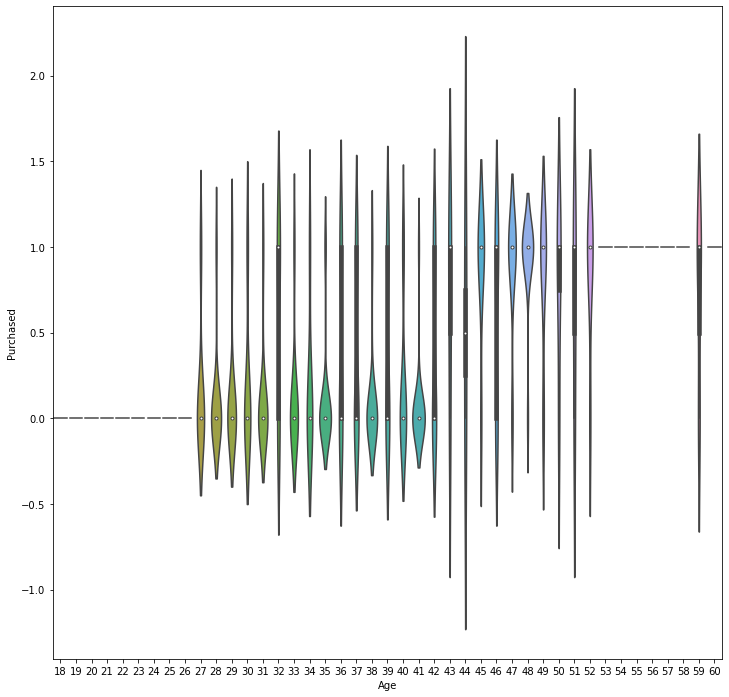

In [59]:
plt.figure(figsize=(12,12))
sns.violinplot(df['Age'],df['Purchased'])

We see age playing very import role in the purchase....younger customers are not purchasing while as we see age above 44, we see
many purchase =1

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

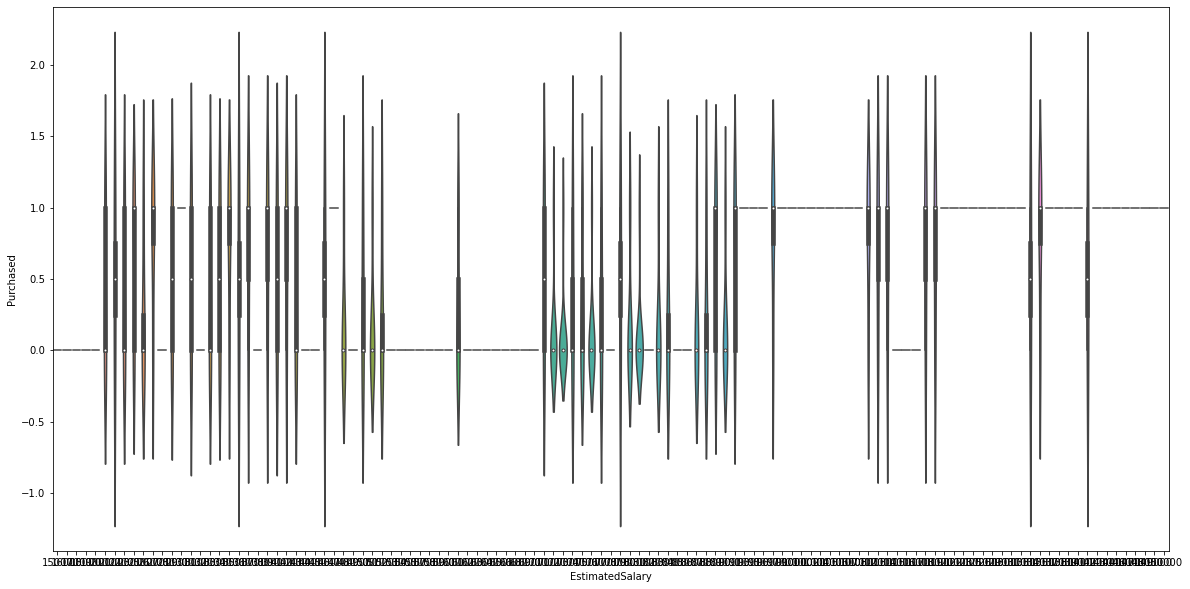

In [63]:
plt.figure(figsize=(20,10))
sns.violinplot(df['EstimatedSalary'],df['Purchased'])

With lower salary range, we see fewer purchase =1, while as the salary is increasing, we see more purchase = 1.

Hence, EstimatedSalary is impacting the purchase decision. 

# EDA ENDS

In [64]:
# Encoding

# Gender is not impacting the decision of purchase much...we can easily drop the column, but still keeping it. 

# Encoding the same. 

df = pd.get_dummies(df,columns = ['Gender'],drop_first=True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Spliting The data into x and y

In [65]:
x = df.drop(['Purchased'],axis=1)
y = df['Purchased']

In [68]:
x.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


# Spliting into Training and Testing Sets. 

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 3) (80, 3) (320,) (80,)


# BUILDING THE MODEL

In [71]:
# Libraries for the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:
# Libraries for evaluation

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [128]:
model_names= {'lr' : LogisticRegression(), 'dt' : DecisionTreeClassifier(criterion='gini'), 
              'rf' : RandomForestClassifier(n_estimators=100,criterion='gini'), 
              'knn': KNeighborsClassifier(),'ada': AdaBoostClassifier(),'gb' : GradientBoostingClassifier(),
              'xgb' : XGBClassifier()}

evaluate = {'Accuracy Score': accuracy_score,"Classfication Matrix":classification_report,"Confusion Matrix":confusion_matrix,
           'roc_score':roc_auc_score,'roc_curve':roc_curve}

In [138]:
def build_a_model(key,value):
    key = value
    key.fit(x_train,y_train)
    y_pred_train = key.predict(x_train)
    y_pred_test = key.predict(x_test)
    print(value)
    print("~~~~~~~~~~~~~~~~~\n")
   
    for nm,evl in evaluate.items():
        print(nm)
        print("-----------------------------")
        if nm=="roc_curve":
            print("ROC - Curve")
            fpr,tpr,threshold=evl(y_test,y_pred_test)
            plt.figure(figsize=(6,6))
            plt.plot(fpr,tpr,label="RoC Curve (area = %0.2f)"%roc_auc_score(y_test,y_pred_test))
            plt.plot([0,1],[0,1],'k--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.0])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.show()
        else:
            print(evl(y_train,y_pred_train))
            print(evl(y_test,y_pred_test))  

LogisticRegression()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.653125
0.6
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       209
           1       0.00      0.00      0.00       111

    accuracy                           0.65       320
   macro avg       0.33      0.50      0.40       320
weighted avg       0.43      0.65      0.52       320

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        48
           1       0.00      0.00      0.00        32

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80

Confusion Matrix
-----------------------------
[[209   0]
 [111   0]]
[[48  0]
 [32  0]]
roc_score
-----------------------------
0.5
0.5
roc_curve
-----------------------------
ROC - Curve


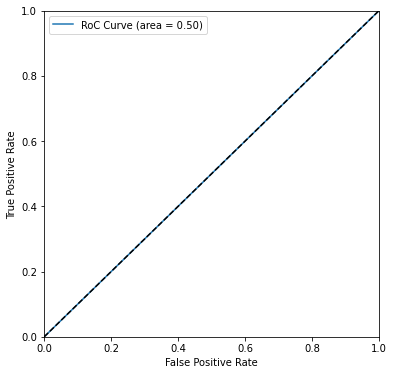

************************************************************

DecisionTreeClassifier()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.996875
0.8
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      0.99      1.00       111

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        48
           1       0.77      0.72      0.74        32

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80

Confusion Matrix
-----------------------------
[[209   0]
 [  1 110]]
[[41  7]
 [ 9 23]]
roc_score
-----------------------------
0.

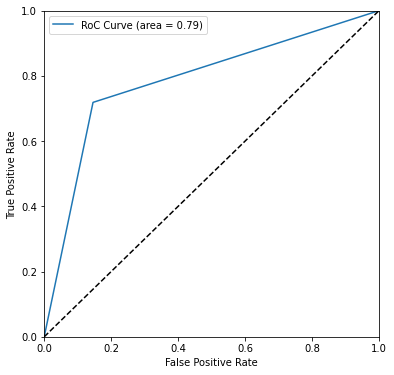

************************************************************

RandomForestClassifier()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.996875
0.85
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      0.99      1.00       111

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80

Confusion Matrix
-----------------------------
[[209   0]
 [  1 110]]
[[39  9]
 [ 3 29]]
roc_score
-----------------------------
0

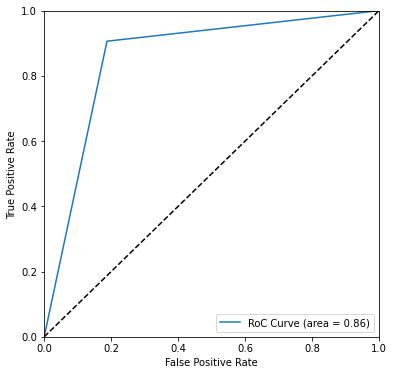

************************************************************

KNeighborsClassifier()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.8875
0.75
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       209
           1       0.89      0.77      0.83       111

    accuracy                           0.89       320
   macro avg       0.89      0.86      0.87       320
weighted avg       0.89      0.89      0.89       320

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.70      0.66      0.68        32

    accuracy                           0.75        80
   macro avg       0.74      0.73      0.74        80
weighted avg       0.75      0.75      0.75        80

Confusion Matrix
-----------------------------
[[199  10]
 [ 26  85]]
[[39  9]
 [11 21]]
roc_score
-----------------------------
0.858

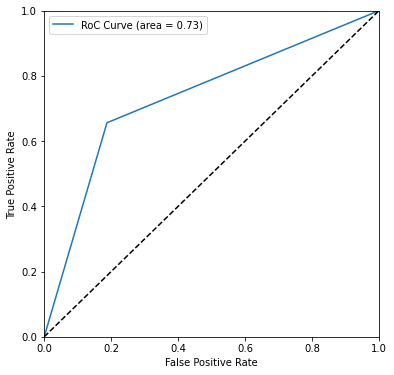

************************************************************

AdaBoostClassifier()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.953125
0.875
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       209
           1       0.93      0.94      0.93       111

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        48
           1       0.81      0.91      0.85        32

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80

Confusion Matrix
-----------------------------
[[201   8]
 [  7 104]]
[[41  7]
 [ 3 29]]
roc_score
-----------------------------
0.94

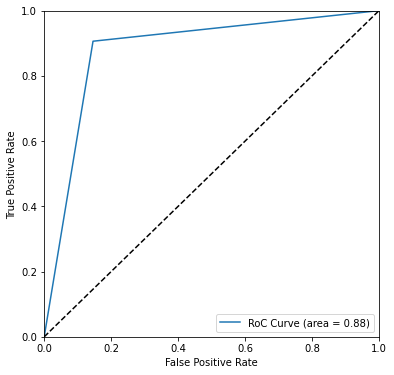

************************************************************

GradientBoostingClassifier()
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.98125
0.85
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       209
           1       0.97      0.97      0.97       111

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.78      0.88      0.82        32

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.85        80
weighted avg       0.86      0.85      0.85        80

Confusion Matrix
-----------------------------
[[206   3]
 [  3 108]]
[[40  8]
 [ 4 28]]
roc_score
----------------------------

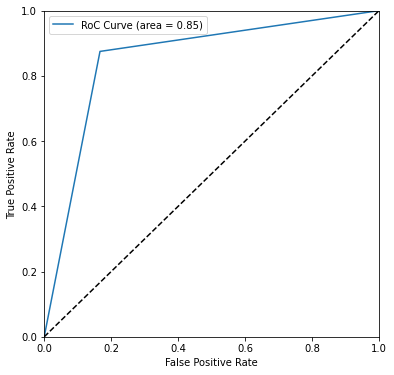

************************************************************

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
~~~~~~~~~~~~~~~~~

Accuracy Score
-----------------------------
0.990625
0.8375
Classfication Matrix
-----------------------------
              precision    recall  f1-score   support



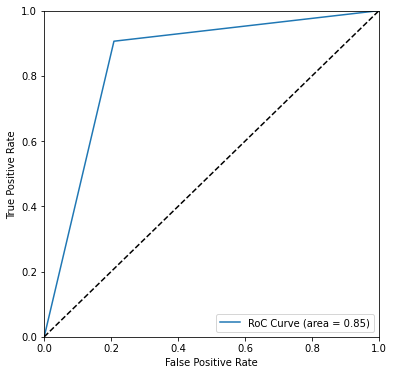

************************************************************



In [139]:
for k,v in model_names.items():
    build_a_model(k,v)
    print("************************************************************\n")

# 1. Observations

1. LogisticRegression()
Accuracy of Logistic Regression was very bad. We will not use Logistic Regression for this dataset. 
Even the Roc_auc curve shows a not a very good model. 

2. DecisionTreeClassifier() 
Decsion Tree gave good accuracy but the training accuracy is extremy high - 99.68% while the testing accuracy is only 80%. 
We can say that there may be an issue of overfitting. Variance is also high....almost 20% variance. 

Not a very good Model. 

3.RandomForestClassifier()
Random Forest is slightly better model - as we see training accuracy is high but the testing accuracy is also not 
bad. it is 85%. We can say this has given us better result than decision tree. If we increase, n_estimators to 500, we may
see the accuracy going higher. 

OKay model. 

4. KNeighborsClassifier()
training accuracy = 88% and testing accruacy =75%. Other parametes are also decent. It is good model, although if the accuracy 
was more increased for both training and testing dataset. 

5. AdaBoostClassifier()
Training Accuracy = 95.3% and Testing Accuracy = 87.5% which shows a very good accuracy. 
This model is really good...both training and testing accuracy is great. 

Roc_Auc curve is also good. 
Overall a very good model. 

6. GradientBoostingClassifier()
As expected of GradientBoostingClassifier(), the training accuracy = 98% and testing accuracy = 85%...very good model.
All the pther parameters shows good score. 

7. XGBClassifier 
Training accuracy = 99% and testing accuracy = 83.75%.
all other scores are also good. 


FINAL RECOMMENDATIONS:
    
GRADIENT BOOST IS THE BEST MODEL. 



# Regularization  - CHecking issue of Overfitting in the model.

In [143]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [146]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge = np.where(y_pred_ridge >0.5,1,0)
accuracy_score(y_test,y_pred_ridge)

0.8375

In [147]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso = np.where(y_pred_lasso>0.5,1,0)
accuracy_score(y_test,y_pred_lasso)

0.8375

In [148]:
enet = ElasticNet(alpha=0.1)
enet.fit(x_train,y_train)
y_pred_enet=enet.predict(x_test)
y_pred_enet=np.where(y_pred_enet>0.5,1,0)
accuracy_score(y_test,y_pred_enet)

0.8375

### Observations
All the scores are good. THere is no problem of overfitting.

# DONE